In [1]:
import os
import sys
from pathlib import Path
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt


project_dir = Path.cwd().parent
sys.path.append(str(project_dir / 'src'))
from utils import fasta_to_str, check_homologous_sequences
from blast import BLAST
from global_alignment import GlobalAlignment
from visualization import plot_alignment, plot_frequency

np.random.seed(23)

### Human Chr 20 and Chimp Chr 20

In this notebook, we will attempt to find regions of alignment in a region of the Human chr 20 and Chimp chr 20.  That should include a gene I once studied, KCC2.  We first use a custom implementation of BLAST (basic local alignment search tool) to find regions of local alignment.  Then, using another custom implementation of a global alignment algorithm, we confirm alignment from the previous step.  Finally, we visualize the alignmet of the homologous regions.

Download the necessary files from Ensembl

https://ftp.ensembl.org/pub/release-112/fasta/homo_sapiens/dna/

https://ftp.ensembl.org/pub/release-113/fasta/pan_troglodytes/dna/

In [2]:
file_folder = r"E:\Users\Rich\Documents\Datasets\genomes\human"
filename = r"Homo_sapiens.GRCh38.dna_rm.chromosome.20.fa"
filepath = os.path.join(file_folder, filename)

hum = fasta_to_str(filepath)
print(len(hum))

20 dna_rm:chromosome chromosome:GRCh38:20:1:64444167:1 REF
64444167


In [3]:
file_folder = r"E:\Users\Rich\Documents\Datasets\genomes\chimp"
filename = r"Pan_troglodytes.Pan_tro_3.0.dna_rm.chromosome.20.fa"
filepath = os.path.join(file_folder, filename)

chimp = fasta_to_str(filepath)
print(len(chimp))

20 dna_rm:chromosome chromosome:Pan_tro_3.0:20:1:66533130:1 REF
66533130


In [4]:
hum_slice = hum[46_000_000:46_100_000]
chimp_slice = chimp[47_000_000:48_000_000]

del hum
del chimp

### 1) BLAST

In [5]:
blast = BLAST(hum_slice, chimp_slice)

In [6]:
blast.seed(kmers=30, kmer_length=10)

TGGGCAATGG ---- 2 ---- 1
CCAAGGGGAA ---- 3 ---- 1
TATTTGATTT ---- 2 ---- 1
GTCCCAGGAT ---- 4 ---- 1
TGTATTAAAT ---- 2 ---- 1
GGAAGGAGCC ---- 3 ---- 2
AGGCCACATC ---- 2 ---- 1
AGTTTGCCGG ---- 1 ---- 1
GATGTGGGAT ---- 1 ---- 1
TCCTCGCCCC ---- 2 ---- 1
TCCTCCGTGT ---- 2 ---- 1
ACCAGCGAGG ---- 1 ---- 1
GCATGGTGTT ---- 1 ---- 1
GGGTGATGGT ---- 3 ---- 1
GTTCCCTGTA ---- 1 ---- 1
TCTGCTGGTA ---- 2 ---- 1
TACCTAGAGG ---- 2 ---- 1
ACTGGCACCA ---- 1 ---- 1
ACTACTAATT ---- 1 ---- 1
CAACAGCAGC ---- 3 ---- 1
AGTGACTTGT ---- 1 ---- 1
ACCTGCGTCC ---- 1 ---- 1
GGGACAGAAG ---- 2 ---- 1
GGAATATAGT ---- 1 ---- 1
GCCAGTTTCG ---- 1 ---- 1
CACCCGAAAC ---- 1 ---- 1
CTGATCTGGG ---- 2 ---- 1
AGAGAACCTC ---- 1 ---- 1
GCAAGGCCAA ---- 2 ---- 2
TTATTAGATA ---- 1 ---- 1
30 kmers stored.
22 total rejects.


In [9]:
blast.extend_seeds(perc_homology=0.8, min_match_len=10_000, threshold=1_000)

kmer: GGAAGGAGCC  match length: 11266
seq1[11077:22344]  seq2[711430:722697]
kmer: GGAAGGAGCC  match length: 13764
seq1[60452:74217]  seq2[760730:774495]
kmer: AGTTTGCCGG  match length: 11266
seq1[11075:22342]  seq2[711428:722695]
kmer: TCCTCCGTGT  match length: 11743
seq1[51741:63485]  seq2[752006:763750]
kmer: ACCAGCGAGG  match length: 10001
seq1[6323:16325]  seq2[706702:716704]
kmer: GCATGGTGTT  match length: 12684
seq1[32104:44789]  seq2[732345:745030]
kmer: GTTCCCTGTA  match length: 10132
seq1[617:10750]  seq2[701006:711139]
kmer: ACTGGCACCA  match length: 14761
seq1[37898:52660]  seq2[738150:752912]
kmer: AGTGACTTGT  match length: 13462
seq1[82917:96380]  seq2[783194:796657]
kmer: ACCTGCGTCC  match length: 10183
seq1[83738:93922]  seq2[784014:794198]
kmer: GGGACAGAAG  match length: 11776
seq1[51543:63320]  seq2[751808:763585]
kmer: AGAGAACCTC  match length: 14324
seq1[38600:52925]  seq2[738852:753177]
kmer: GCAAGGCCAA  match length: 14624
seq1[36984:51609]  seq2[737236:751861]
km

In [10]:
blast.print_alignment_report()

From longest to shortest:
kmer: ACTGGCACCA  match length: 14761
seq1[37898:52660]  seq2[738150:752912]
A total of 10635 of 14762 bases in alignment.
Fraction aligned: 0.7204308359300907
----------------------------------------
kmer: GCAAGGCCAA  match length: 14624
seq1[36984:51609]  seq2[737236:751861]
A total of 10522 of 14625 bases in alignment.
Fraction aligned: 0.7194529914529915
----------------------------------------
kmer: AGAGAACCTC  match length: 14324
seq1[38600:52925]  seq2[738852:753177]
A total of 10272 of 14325 bases in alignment.
Fraction aligned: 0.7170680628272251
----------------------------------------
kmer: GGAAGGAGCC  match length: 13764
seq1[60452:74217]  seq2[760730:774495]
A total of 9804 of 13765 bases in alignment.
Fraction aligned: 0.7122411914275336
----------------------------------------
kmer: AGTGACTTGT  match length: 13462
seq1[82917:96380]  seq2[783194:796657]
A total of 9552 of 13463 bases in alignment.
Fraction aligned: 0.7095001114164747
------------

In [11]:
'''
Moving forward, let us use kmer with the longest homologous region.

kmer: ACTGGCACCA  match length: 14761
seq1[37898:52660]  seq2[738150:752912]
A total of 10635 of 14762 bases in alignment.
Fraction aligned: 0.7204308359300907
'''
splice1, splice2 = blast.export_homologous_sequences('ACTGGCACCA', 37898, 738150)

print(len(splice1))
print(len(splice2))

14762
14762


##### Checks

In [12]:
check_homologous_sequences(splice1, splice2)

A total of 10635 of 14762 bases in alignment.
Fraction aligned: 0.7204308359300907


### 2) Globally Aligning Slices

In [13]:
global_alignment = GlobalAlignment(splice1, splice2)

In [14]:
global_alignment.print_report()

seq1 length: 14762  seq2 length: 14762
Most bases aligned: 10635
Index to align: -1


## 3) Visualization

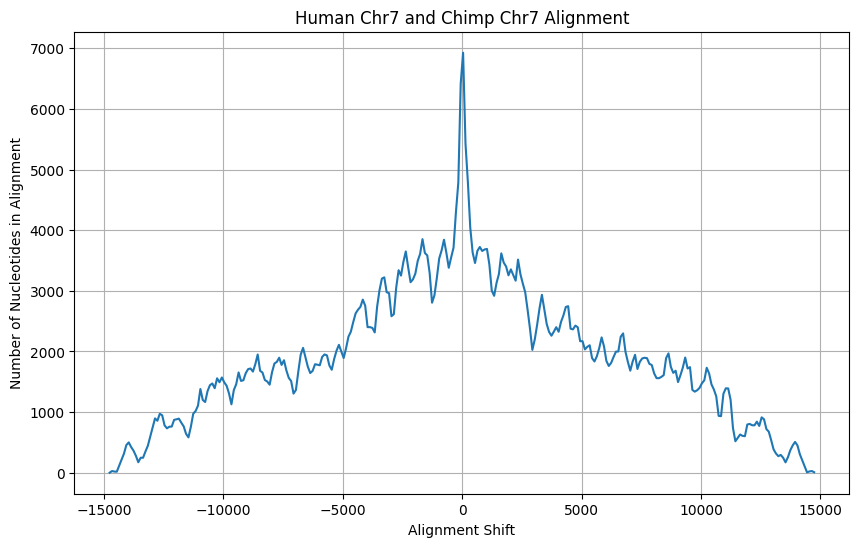

In [15]:
matches_title = 'Human Chr7 and Chimp Chr7 Alignment'
plot_alignment(splice1, global_alignment.matches, matches_title)

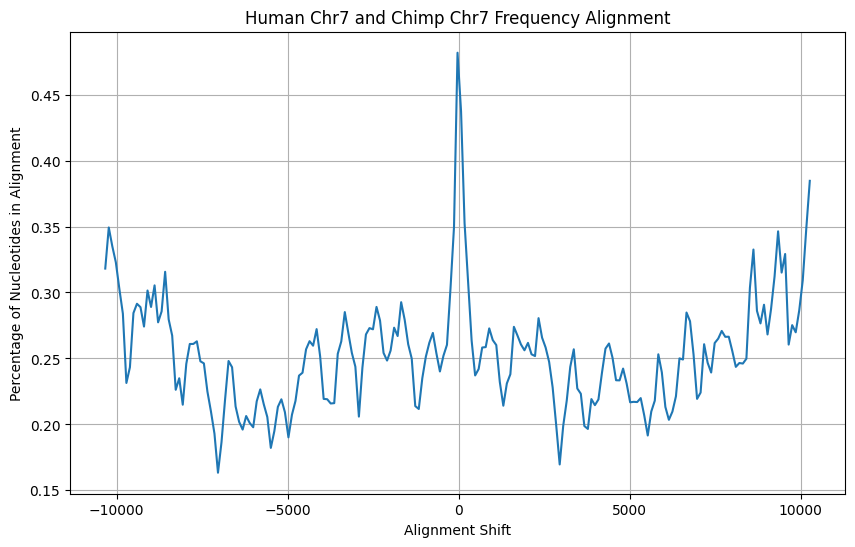

In [16]:
freq_title = 'Human Chr7 and Chimp Chr7 Frequency Alignment'
plot_frequency(global_alignment.freq, freq_title)